# Regression Model to Predict the Price of Canadian Houses

* Author : Alperen Demirci 
* Date : 06/02/2024
* Mail : alperendemirci65@gmail.com

## Introduction
The aim of this notebook is to predict the price of Canadian houses.

The dataset is taken from Kaggle. The dataset contains 10 columns and 35768 rows. The columns are as follows:
1. City
2. Price (Our target variable)
3. Adress
4. Number of Bedrooms
5. Number of Bathrooms
6. Province 
7. Population
8. Latitude
9. Longitude
10. Median Income

The dataset is taken from Kaggle. For more information about the dataset, please visit the link above.

Link : https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities/data

## What will we do?
1. Data Preprocessing
    * Missing Values
    * Outliers
    * Feature Scaling
    * Encoding

2. Exploratory Data Analysis
    * Correlation
    * Distribution of the Target Variable
    * Distribution of the Features

3. Model Building
    * Multiple Linear Regression
    * Support Vector Regression
    * Random Forest Regressor
    * KNN Regressor
    * XGBoost
    * MLP Regressor (Neural Network)

4. Model Evaluation
    * R2 Score
    * Mean Squared Error
    * Mean Absolute Error
    * Root Mean Squared Error
5. Conclusion


* First of all, let's start by importing the necessary libraries and loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset from the csv file and displaying the first 5 rows of the dataset.

In [2]:
df_raw = pd.read_csv('canadian_houses.csv', encoding='latin1')

In [3]:
df_raw.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


So let's start with the first step, Data Preprocessing.

## Data Preprocessing

Let's start with understanding the dataset by displaying the info and description of the columns.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
df_raw.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [6]:
print("Column - Number of unique values")
for col in df_raw.columns:
    print(col,df_raw[col].nunique())

Column - Number of unique values
City 45
Price 4366
Address 31379
Number_Beds 31
Number_Baths 22
Province 9
Population 45
Latitude 45
Longitude 44
Median_Family_Income 32


In [7]:
print("Column - Null values")
for col in df_raw.columns:
    print(col,df_raw[col].isnull().sum())

Column - Null values
City 0
Price 0
Address 0
Number_Beds 0
Number_Baths 0
Province 0
Population 0
Latitude 0
Longitude 0
Median_Family_Income 0


* Inferences from the info and description of the dataset:

    1. Information from the Columns
        * Data types of the columns are **correct**.
        * The dataset contains both geographical and economical data.
        * The columns 'City' and 'Province' are categorical columns. We need to encode these columns.
        * The column 'Price' is our target variable.
        * The columns 'Latitude' and 'Longitude' are geographical data. We may need to do some feature engineering to extract useful information from these columns.
    2. Missing Values
        * There exists **NO** missing values in the dataset.
    3. Unique Values
        * The dataset contains **repetitive** values in the columns.
        * The column 'Adress' contains an unnecessary amount of unique values.
        * Furthermore, when we check the values of the 'Adress' column, we can not extract any useful information from the column. Therefore, we will drop the column.
    4. Descriptive Statistics
        * The Minimum and Maximum values of the columns are **reasonable so far**.
        * Again we will check for outliers in the next steps.

   


Let's start by dropping the 'Adress' column. Then we will encode the 'City' and 'Province' columns.

In [8]:
df_raw.drop(['Address'],inplace=True,axis=1)

In [9]:
df_raw.head()

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


### Outliers
* We will check for outliers in the dataset.
* We will use the IQR method to detect the outliers.
* We'll decide what to do with the outliers after we detect them.

In [10]:
## We need to split columns into categorical and numerical columns

l_col =[]
l_num = []

for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        l_col.append(col)
    else:
        l_num.append(col)

print("Categorical columns",l_col)
print("Numerical columns",l_num)

Categorical columns ['City', 'Province']
Numerical columns ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']


In [11]:
## Detecting the outliers with IQR

for col in l_num:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Column:",col)
    print("Q1:",Q1)
    print("Q3:",Q3)
    print("IQR:",IQR)
    print("Outliers:",df_raw[(df_raw[col] < (Q1 - 3 * IQR)) | (df_raw[col] > (Q3 + 3 * IQR))][col].count())
    print("")

Column: Price
Q1: 459900.0
Q3: 1095000.0
IQR: 635100.0
Outliers: 970

Column: Number_Beds
Q1: 2.0
Q3: 4.0
IQR: 2.0
Outliers: 61

Column: Number_Baths
Q1: 2.0
Q3: 3.0
IQR: 1.0
Outliers: 399

Column: Population
Q1: 109167.0
Q3: 522888.0
IQR: 413721.0
Outliers: 2816

Column: Latitude
Q1: 43.8667
Q3: 49.8881
IQR: 6.0214
Outliers: 0

Column: Longitude
Q1: -122.3167
Q3: -79.8667
IQR: 42.45
Outliers: 91

Column: Median_Family_Income
Q1: 82000.0
Q3: 97000.0
IQR: 15000.0
Outliers: 0



IQR Method told us that there are outliers in the dataset. We will not drop the outliers for now. 

We will check for the boxplots of the columns to see the outliers visually.

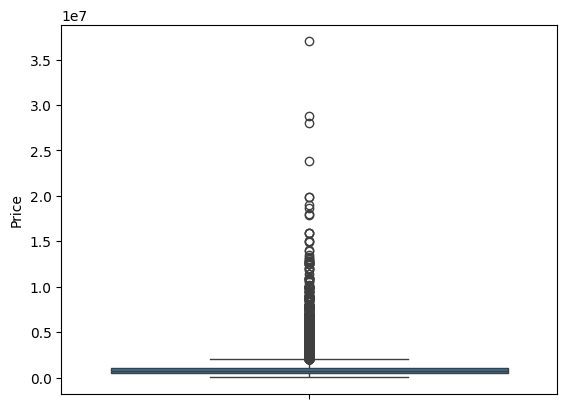

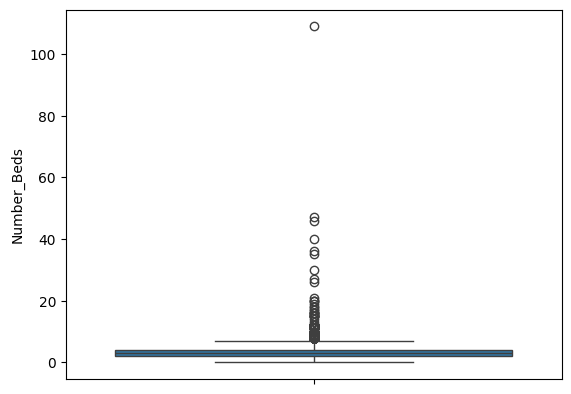

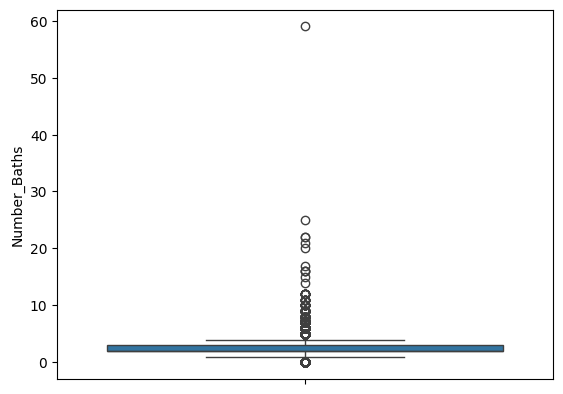

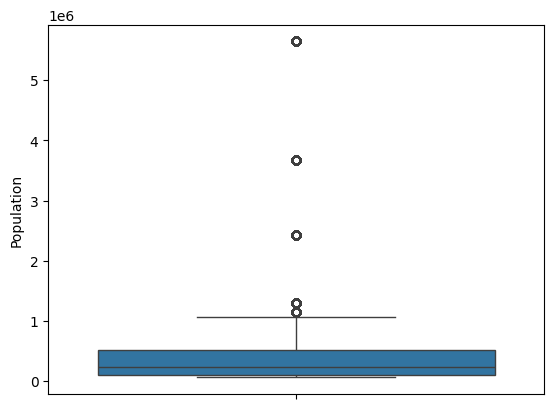

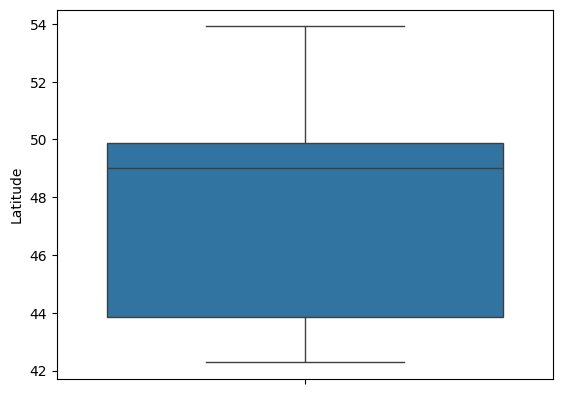

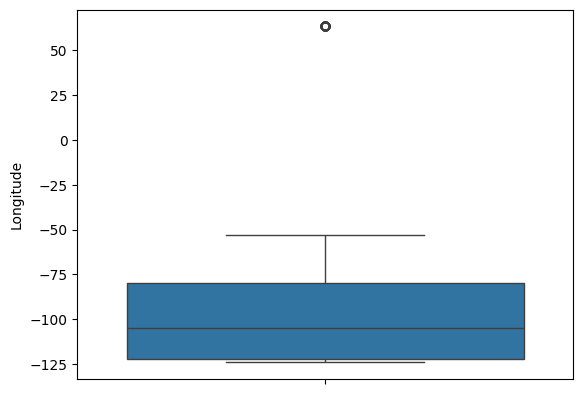

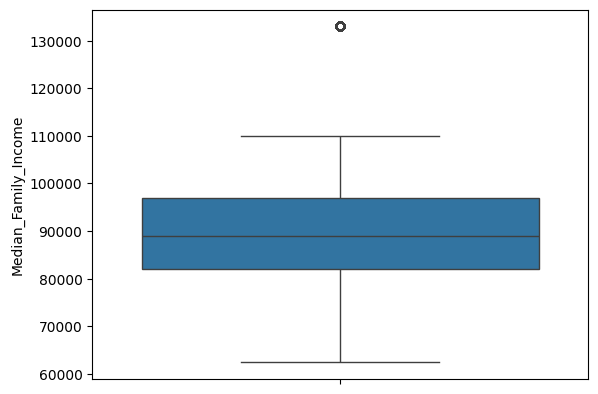

In [12]:
for col in l_num:
    sns.boxplot(df_raw[col])
    plt.show()

Let's check the distribution of the features.

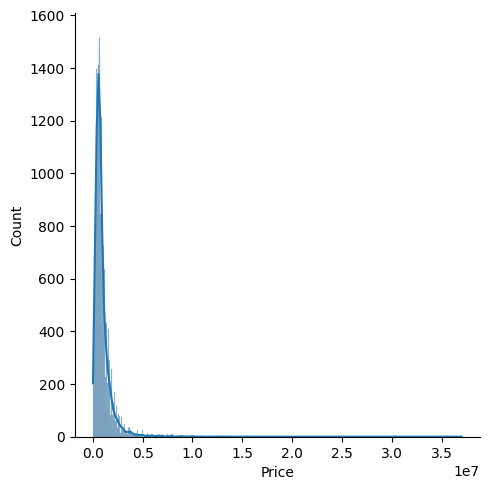

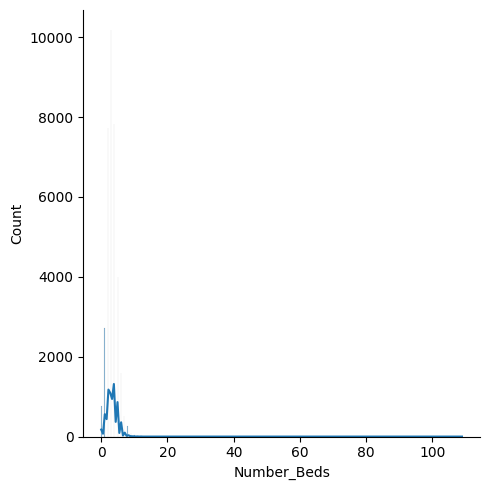

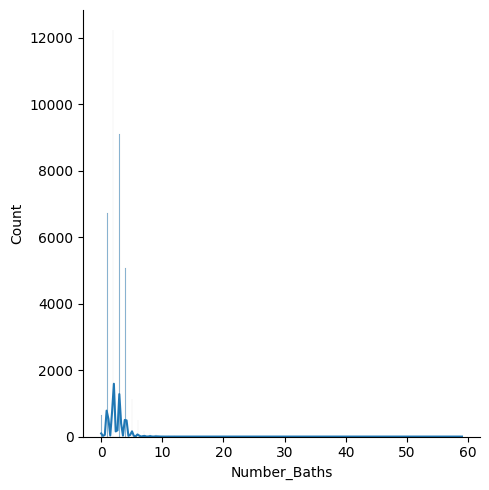

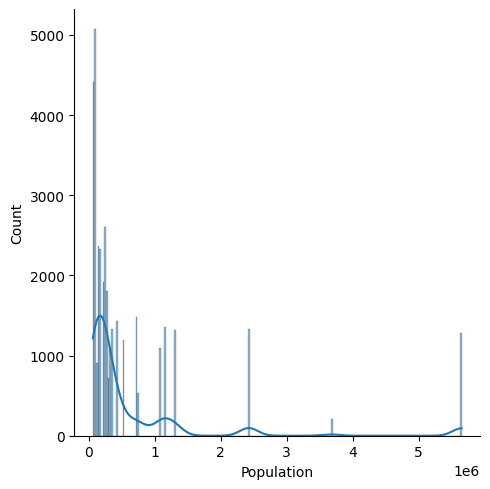

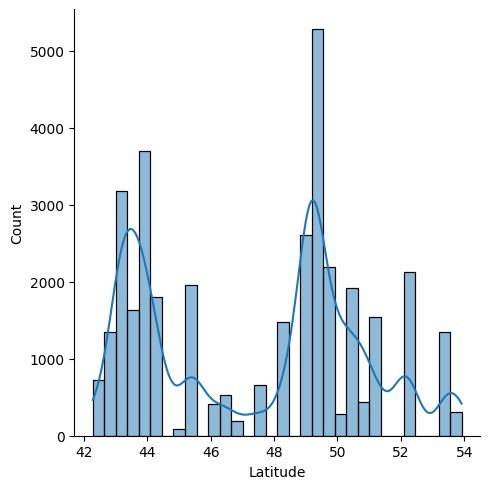

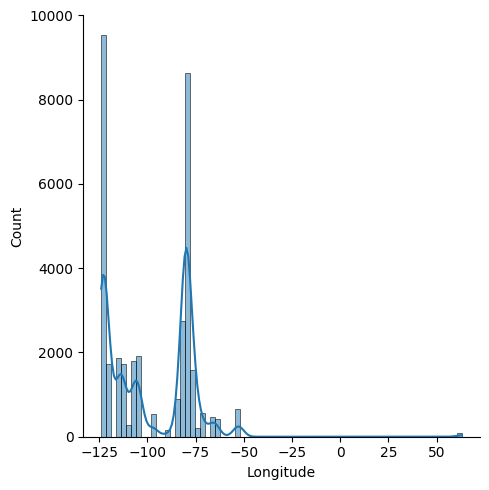

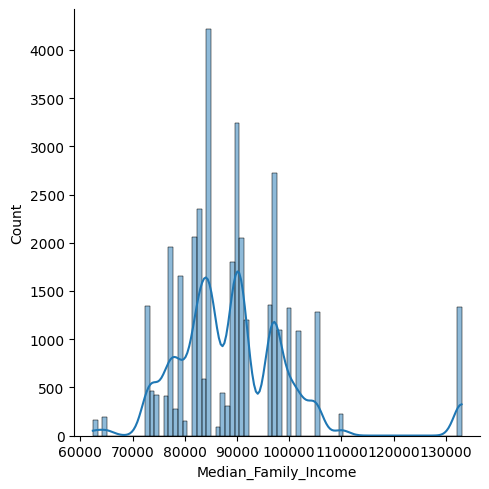

In [13]:
for col in l_num:
    sns.displot(df_raw[col],kde=True)
    plt.show()

Let's check the distribution of the categorical variables.

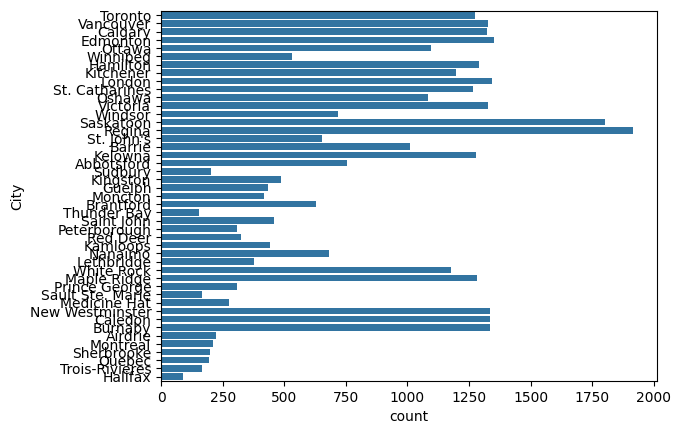

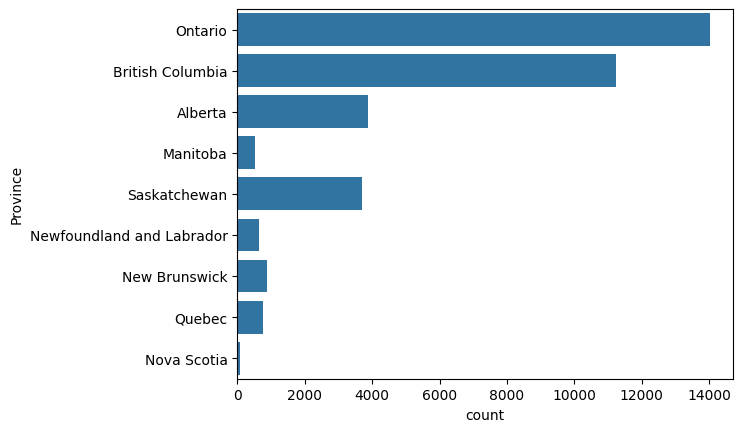

In [14]:
for col in l_col:
    sns.countplot(df_raw[col])
    plt.show()

Let's check the percentage of the categorical variables.

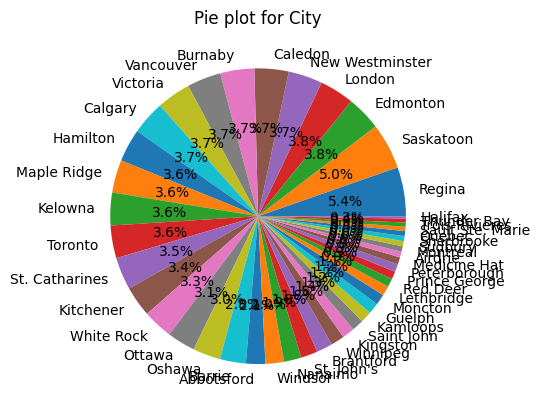

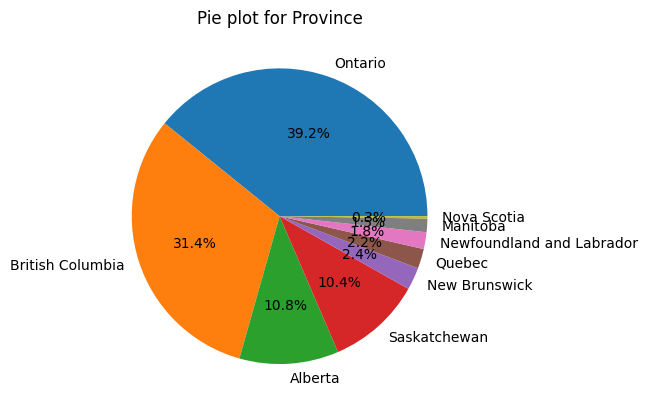

In [15]:
for col in l_col:
    plt.title("Pie plot for "+col)
    plt.pie(df_raw[col].value_counts(),labels=df_raw[col].value_counts().index,autopct='%1.1f%%')
    plt.show()

In [16]:
for col in l_col:
    print("Column:",col)
    print(df_raw[col].value_counts(normalize=True)*100)
    print("")

Column: City
City
Regina              5.359539
Saskatoon           5.032431
Edmonton            3.777119
London              3.760344
New Westminster     3.737978
Caledon             3.735182
Burnaby             3.729591
Vancouver           3.712816
Victoria            3.704429
Calgary             3.696041
Hamilton            3.603780
Maple Ridge         3.584209
Kelowna             3.578618
Toronto             3.567435
St. Catharines      3.545068
Kitchener           3.352158
White Rock          3.285059
Ottawa              3.066987
Oshawa              3.025050
Barrie              2.829345
Abbotsford          2.110825
Windsor             2.012972
Nanaimo             1.909528
St. John's          1.828450
Brantford           1.755759
Winnipeg            1.484567
Kingston            1.358756
Saint John          1.280474
Kamloops            1.235741
Guelph              1.218967
Moncton             1.163051
Lethbridge          1.059606
Red Deer            0.911429
Prince George       0.858

### What to do next?
* Categorical Variables

    1. City
        * For the City column it looks like we have lots of unique values.
        * We can not encode the column with One Hot Encoding because it will create a lot of columns. Our model will be cursed with the curse of dimensionality :) .
        * We can not extract any useful information from the column. Therefore, we will drop the column.

    2. Province
        * For the Province column, we can encode the column with One Hot Encoding. Because the column contains only 13 unique values.
        * However there exists some categories which have really low percentage. We can drop these categories.
        * These categories are : Newfoundland and Labrador - %1.836837, Manitoba - %1.481771, Nova Scotia - %0.254417.
        * After dropping these categories, we still can represent the %94.5 of the data. Therefore, we will drop these categories.
        

* Numerical Variables
    * Latitude and Longitude
        * We can extract useful information from the Latitude and Longitude columns.
        * We can use the KMeans algorithm to cluster the cities
        * Distributions of these features are bimodal.
    * Median Income
        * The distribution of the median income is near to normal.
        * It is slightly right-skewed.
    * Others
        * The distributions of the other numerical variables are right-skewed.
        * That's because of the outliers.
     
    * Generally we can say that the distributions of the features are not normal.
    * They are usually right-skewed. That's why we will try to apply the log transformation to the features.
    * With this transformation, we can make the distributions more normal and we won't loose information that much.
    * After applying the log transformation, we will check the distributions of the features again.


- Step 1 : Drop the 'City' column.
- Step 2 : Drop the categories of the 'Province' column which have really low percentage.
- Step 3 : Apply the log transformation to the features. If the distributions are still not normal, we will drop the outliers.



In [17]:
## Step 1 : Drop the 'City' column.
df_raw.drop(['City'],inplace=True,axis=1)

In [18]:
## Step 2 : Drop the categories of the 'Province' column which have really low percentage.
print(df_raw.shape)
df_raw = df_raw.loc[df_raw['Province'].isin(['Newfoundland and Labrador','Manitoba','Nova Scotia'])==False]

(35768, 8)


In [19]:
df_raw['Province'].value_counts(normalize=True)*100

Province
Ontario             40.634967
British Columbia    32.600754
Alberta             11.249638
Saskatchewan        10.748043
New Brunswick        2.534068
Quebec               2.232531
Name: proportion, dtype: float64

In [20]:
df_raw.shape

(34490, 8)

By dropping the low percentage categories, we have lost the %5.5 of the data. It's not a big deal. We still have enough data to build a model.

In [21]:
## Step 3 : Apply the log transformation to the features. If the distributions are still not normal, we will drop the outliers.
df_log_transformed = df_raw.copy()
for col in l_num:
    if df_log_transformed[col].min() >= 0:
        df_log_transformed[col] = np.log1p(df_log_transformed[col]+ 1e-8)

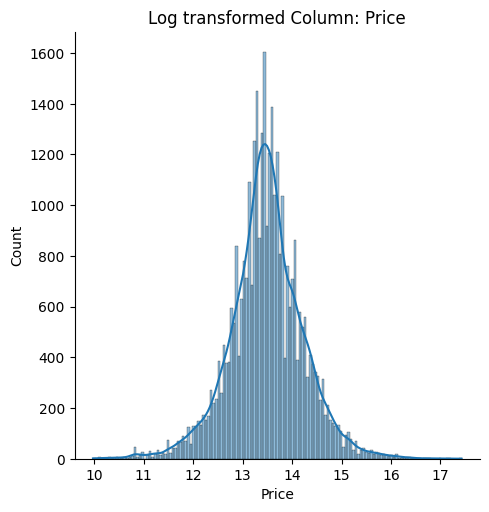

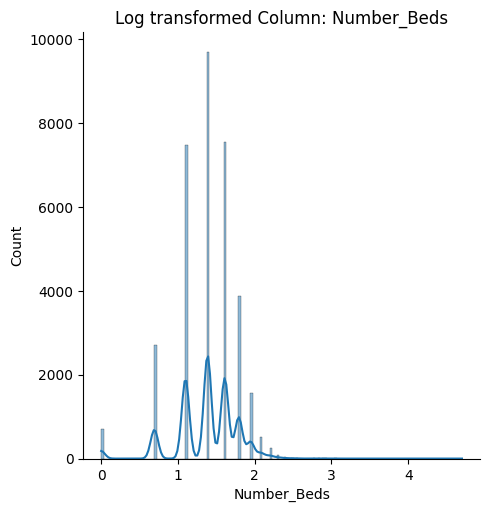

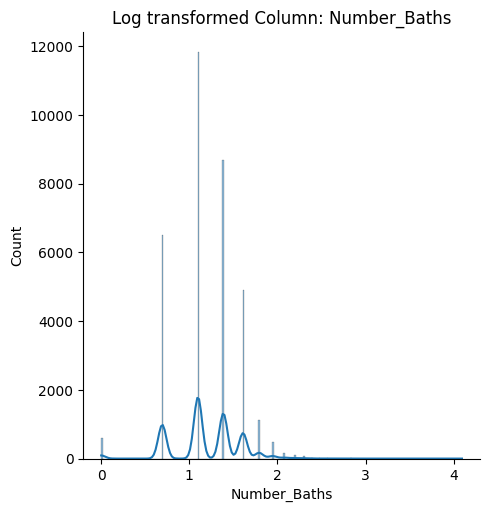

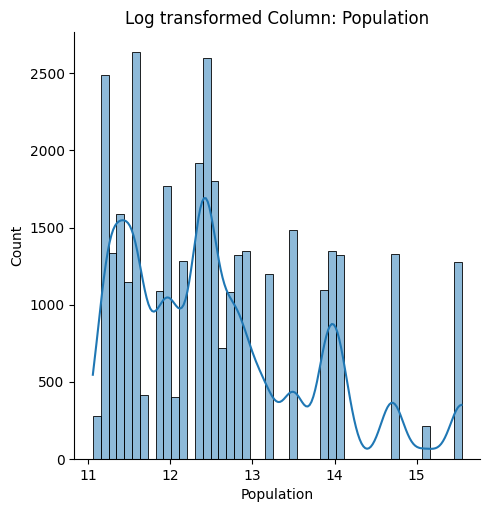

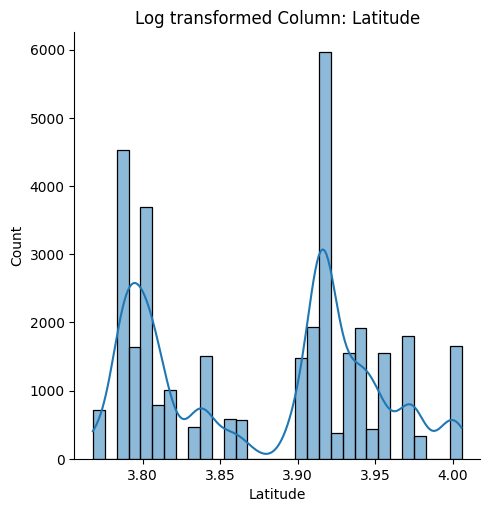

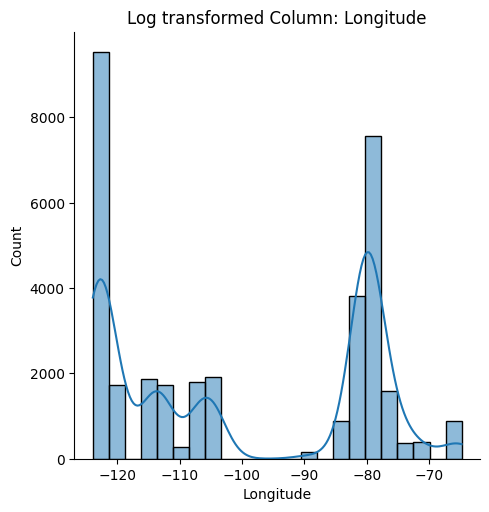

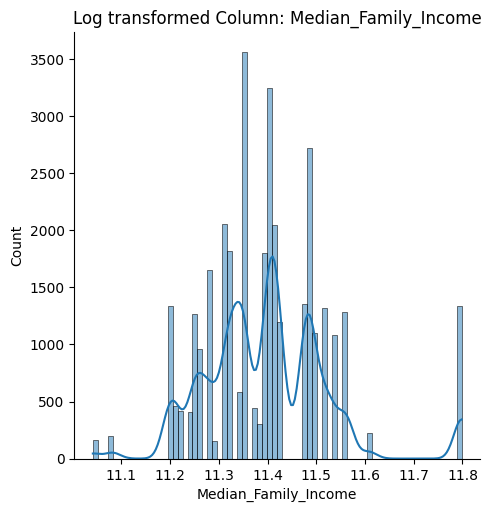

In [22]:
for ele in l_num:
    sns.displot(df_log_transformed[ele],kde=True)
    plt.title("Log transformed Column: "+ele)
    plt.show()

In [23]:
df_drop_outliers = df_raw.copy()

for col in l_num:
    Q1 = df_drop_outliers[col].quantile(0.25)
    Q3 = df_drop_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    df_drop_outliers = df_drop_outliers[(df_drop_outliers[col] > (Q1 - 3 * IQR)) & (df_drop_outliers[col] < (Q3 + 3 * IQR))]

print("Original shape:",df_raw.shape)
print("Shape after log transformation:",df_log_transformed.shape)
print("Shape after dropping the outliers:",df_drop_outliers.shape)


Original shape: (34490, 8)
Shape after log transformation: (34490, 8)
Shape after dropping the outliers: (30350, 8)


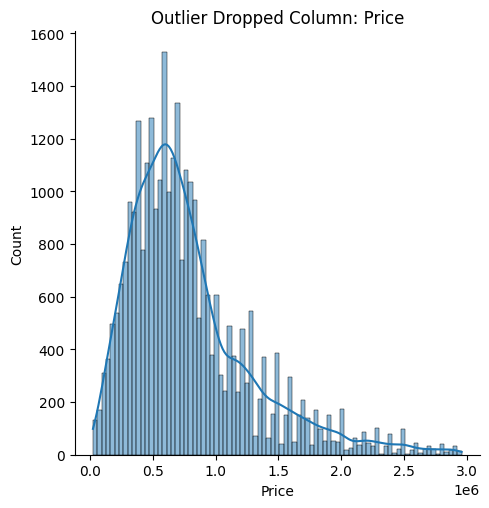

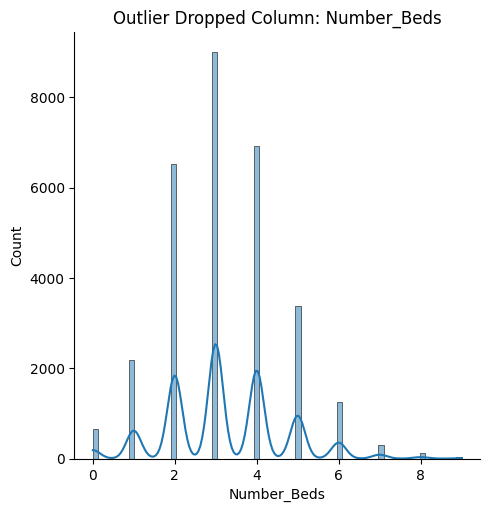

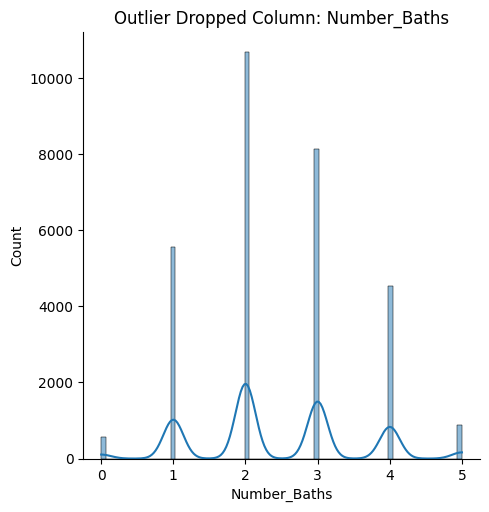

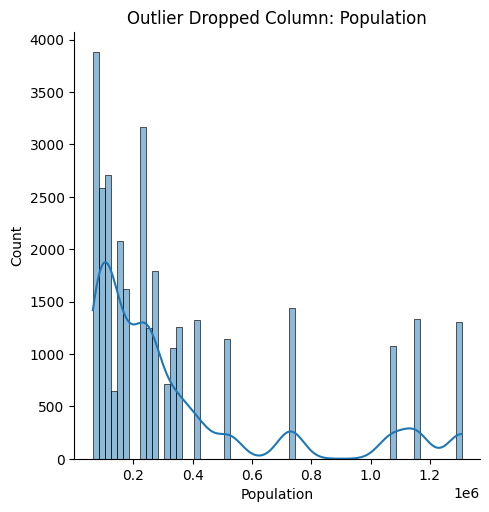

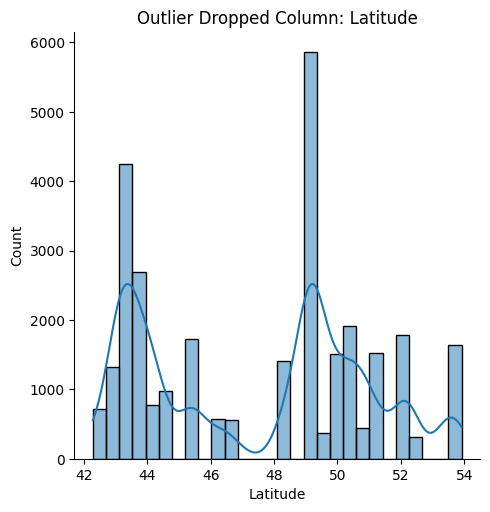

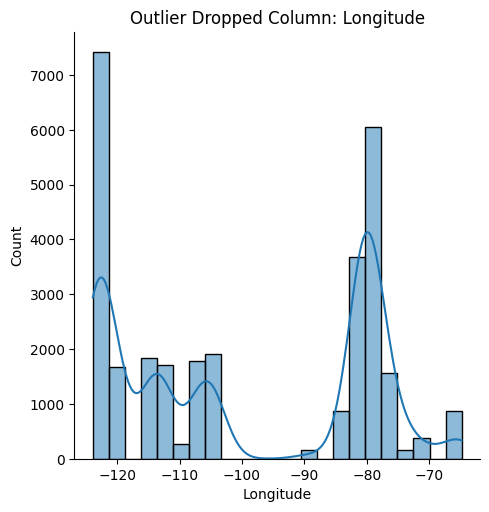

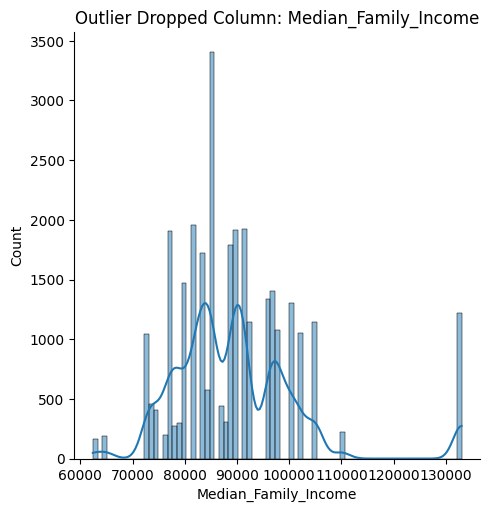

In [24]:
for col in l_num:
    sns.displot(df_drop_outliers[col],kde=True)
    plt.title("Outlier Dropped Column: "+col)
    plt.show()

### Decision between Log Transformation and Outlier Drop
* When we check the log transformation of the features, we can see that the distributions are more normal than before.
* Comparing the log transformation and outlier dropped version, we can say that the log transformation is more successful.
* That is because we have lost a lot of data when we drop the outliers. (Size has been reduced from 34490 to 30350 , %12 of the data has been lost)
* Therefore, we will apply the log transformation to the features.

In [25]:
df_current = df_log_transformed.copy()
print(df_current.shape)

(34490, 8)


In [26]:
## We need to update the categorical and numerical columns after the transformation
l_col =[]
l_num = []

for col in df_current.columns:
    if df_current[col].dtype == 'object':
        l_col.append(col)
    else:
        l_num.append(col)

### What have we done so far?
* Plotted boxplots of the columns to see the outliers.
* Plotted the distributions of raw data, log transformed data and outlier dropped data.
* Checked the percentage of the categorical variables.

### Actions
* Dropped the 'Adress' and 'City' columns.
* Eliminated the low percentage categories of the 'Province' column.
* Applied the log transformation to the features.
* Reduced the size of the dataset from 35768 to 34490.

### What will we do next?
* We will encode the categorical columns with One Hot Encoding.
* We will make use of Z-Score Normalization to scale the features.
* We will move on to the next step, Exploratory Data Analysis.

## Encoding
* We will encode the categorical columns with One Hot Encoding.
* We will use the get_dummies method of the pandas library to encode the categorical columns.
* We do this to convert the categorical columns to numerical columns so our model can use them.

In [27]:
## Step 4 : Apply the one-hot encoding to the categorical columns.
df_current = pd.get_dummies(df_current,columns=l_col,drop_first=True)

In [28]:
df_current.head()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_British Columbia,Province_New Brunswick,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,13.566922,1.386294,1.098612,15.546751,3.800906,-79.3733,11.482477,False,False,True,False,False
1,13.592367,1.386294,0.693147,15.546751,3.800906,-79.3733,11.482477,False,False,True,False,False
2,13.592243,1.098612,1.098612,15.546751,3.800906,-79.3733,11.482477,False,False,True,False,False
3,13.997833,1.609438,1.098612,15.546751,3.800906,-79.3733,11.482477,False,False,True,False,False
4,13.413242,0.693147,0.693147,15.546751,3.800906,-79.3733,11.482477,False,False,True,False,False


In [29]:
df_current.shape

(34490, 12)

* As you can see our feature count is increased from 8 to 12. Hopefully this will help our model to make better predictions.

However we need to be careful about encoding due to the curse of dimensionality.

## Normalization
* We will use the Z-Score Normalization to scale the features.
* We will check the distributions of the features after the normalization.
* The main reason to this normalization is to make the features have the same scale so our model won't have unreasonable bias towards a feature. 

In [30]:
## Step 5 : Normalizing the numerical columns using Z-score normalization
for col in l_num:
    df_current[col] = (df_current[col] - df_current[col].mean())/df_current[col].std() ## Just the Z-score formula

In [31]:
df_current.head()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_British Columbia,Province_New Brunswick,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,0.111899,0.008649,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
1,0.145986,0.008649,-1.337429,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
2,0.145820,-0.715308,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
3,0.689159,0.570194,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
4,-0.093976,-1.735668,-1.337429,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False


In [32]:
df_current.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.449000e+04,3.449000e+04,3.449000e+04,3.449000e+04,3.449000e+04,3.449000e+04,3.449000e+04
mean,7.317622e-16,5.603584e-17,-4.367500e-16,-6.650136e-16,-5.521179e-15,-5.801358e-16,1.124672e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.698797e+00,-3.479985e+00,-3.184432e+00,-1.351926e+00,-1.567675e+00,-1.203209e+00,-2.765650e+00
25%,-5.520035e-01,-7.153076e-01,-2.570010e-01,-8.695881e-01,-1.053774e+00,-1.136781e+00,-6.429935e-01
50%,-3.289692e-02,8.649327e-03,-2.570010e-01,-1.616820e-01,5.028073e-01,-2.423899e-01,-6.420913e-03
75%,5.724746e-01,5.701940e-01,5.095748e-01,5.201200e-01,7.474820e-01,9.873581e-01,6.624598e-01
max,5.282203e+00,8.348856e+00,7.725616e+00,2.631213e+00,1.837276e+00,1.737698e+00,3.115270e+00


* Let's plot the distributions of the features after the normalization.

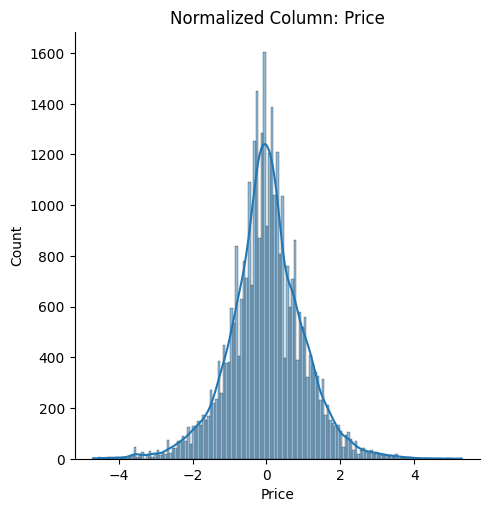

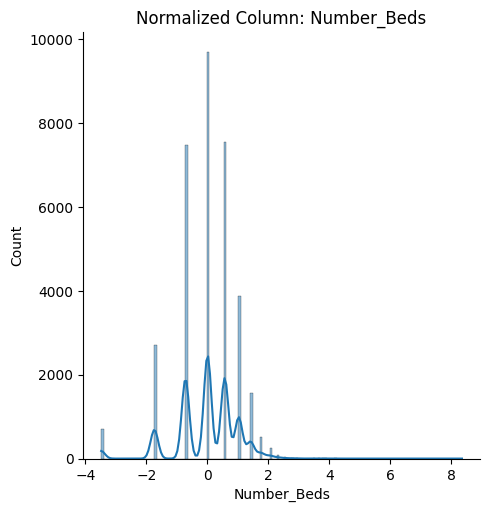

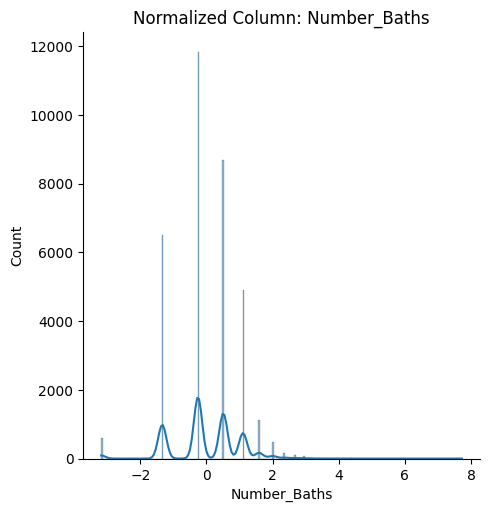

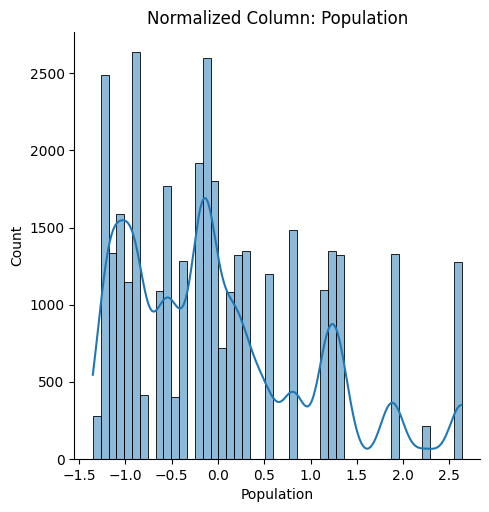

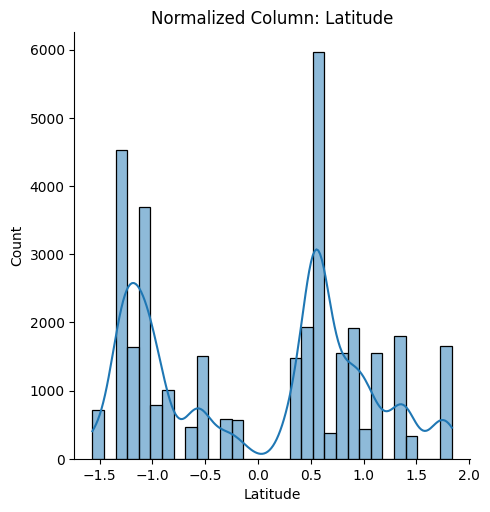

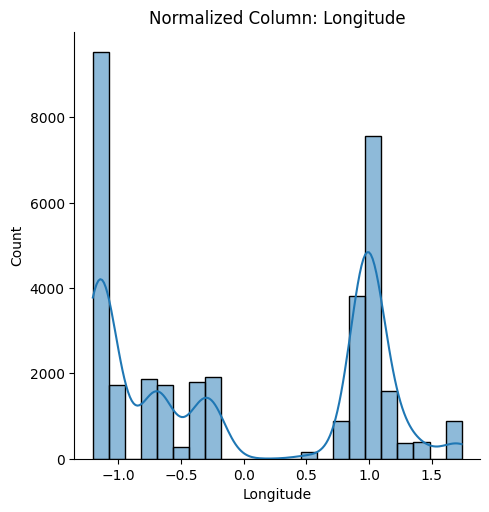

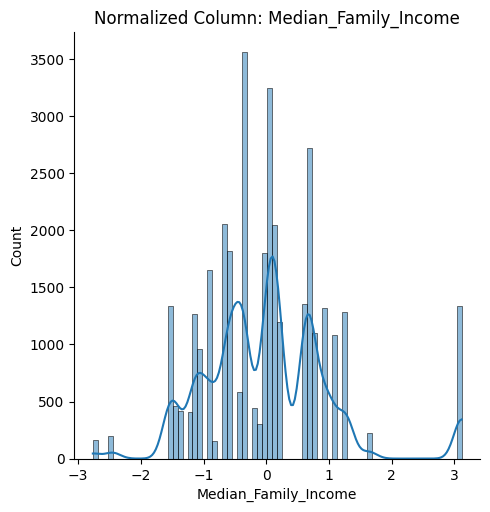

In [33]:
for col in l_num:
    sns.displot(df_current[col],kde=True)
    plt.title("Normalized Column: "+col)
    plt.show()

We can't see a huge difference between the distributions of the features before and after the normalization. 

However, we can say that the features are scaled and closer to normal.

**We have completed the Data Preprocessing.**
* Now we will move on to the next step, Exploratory Data Analysis.

## Exploratory Data Analysis

* We will start by checking the correlation between the features.
* Then we will check the relation of features and target variable.
* We will check if we can cluster the cities with the Latitude and Longitude columns.

### Correlation
* We will check the correlation between the features.
* We will use the heatmap to visualize the correlation matrix.

<Axes: >

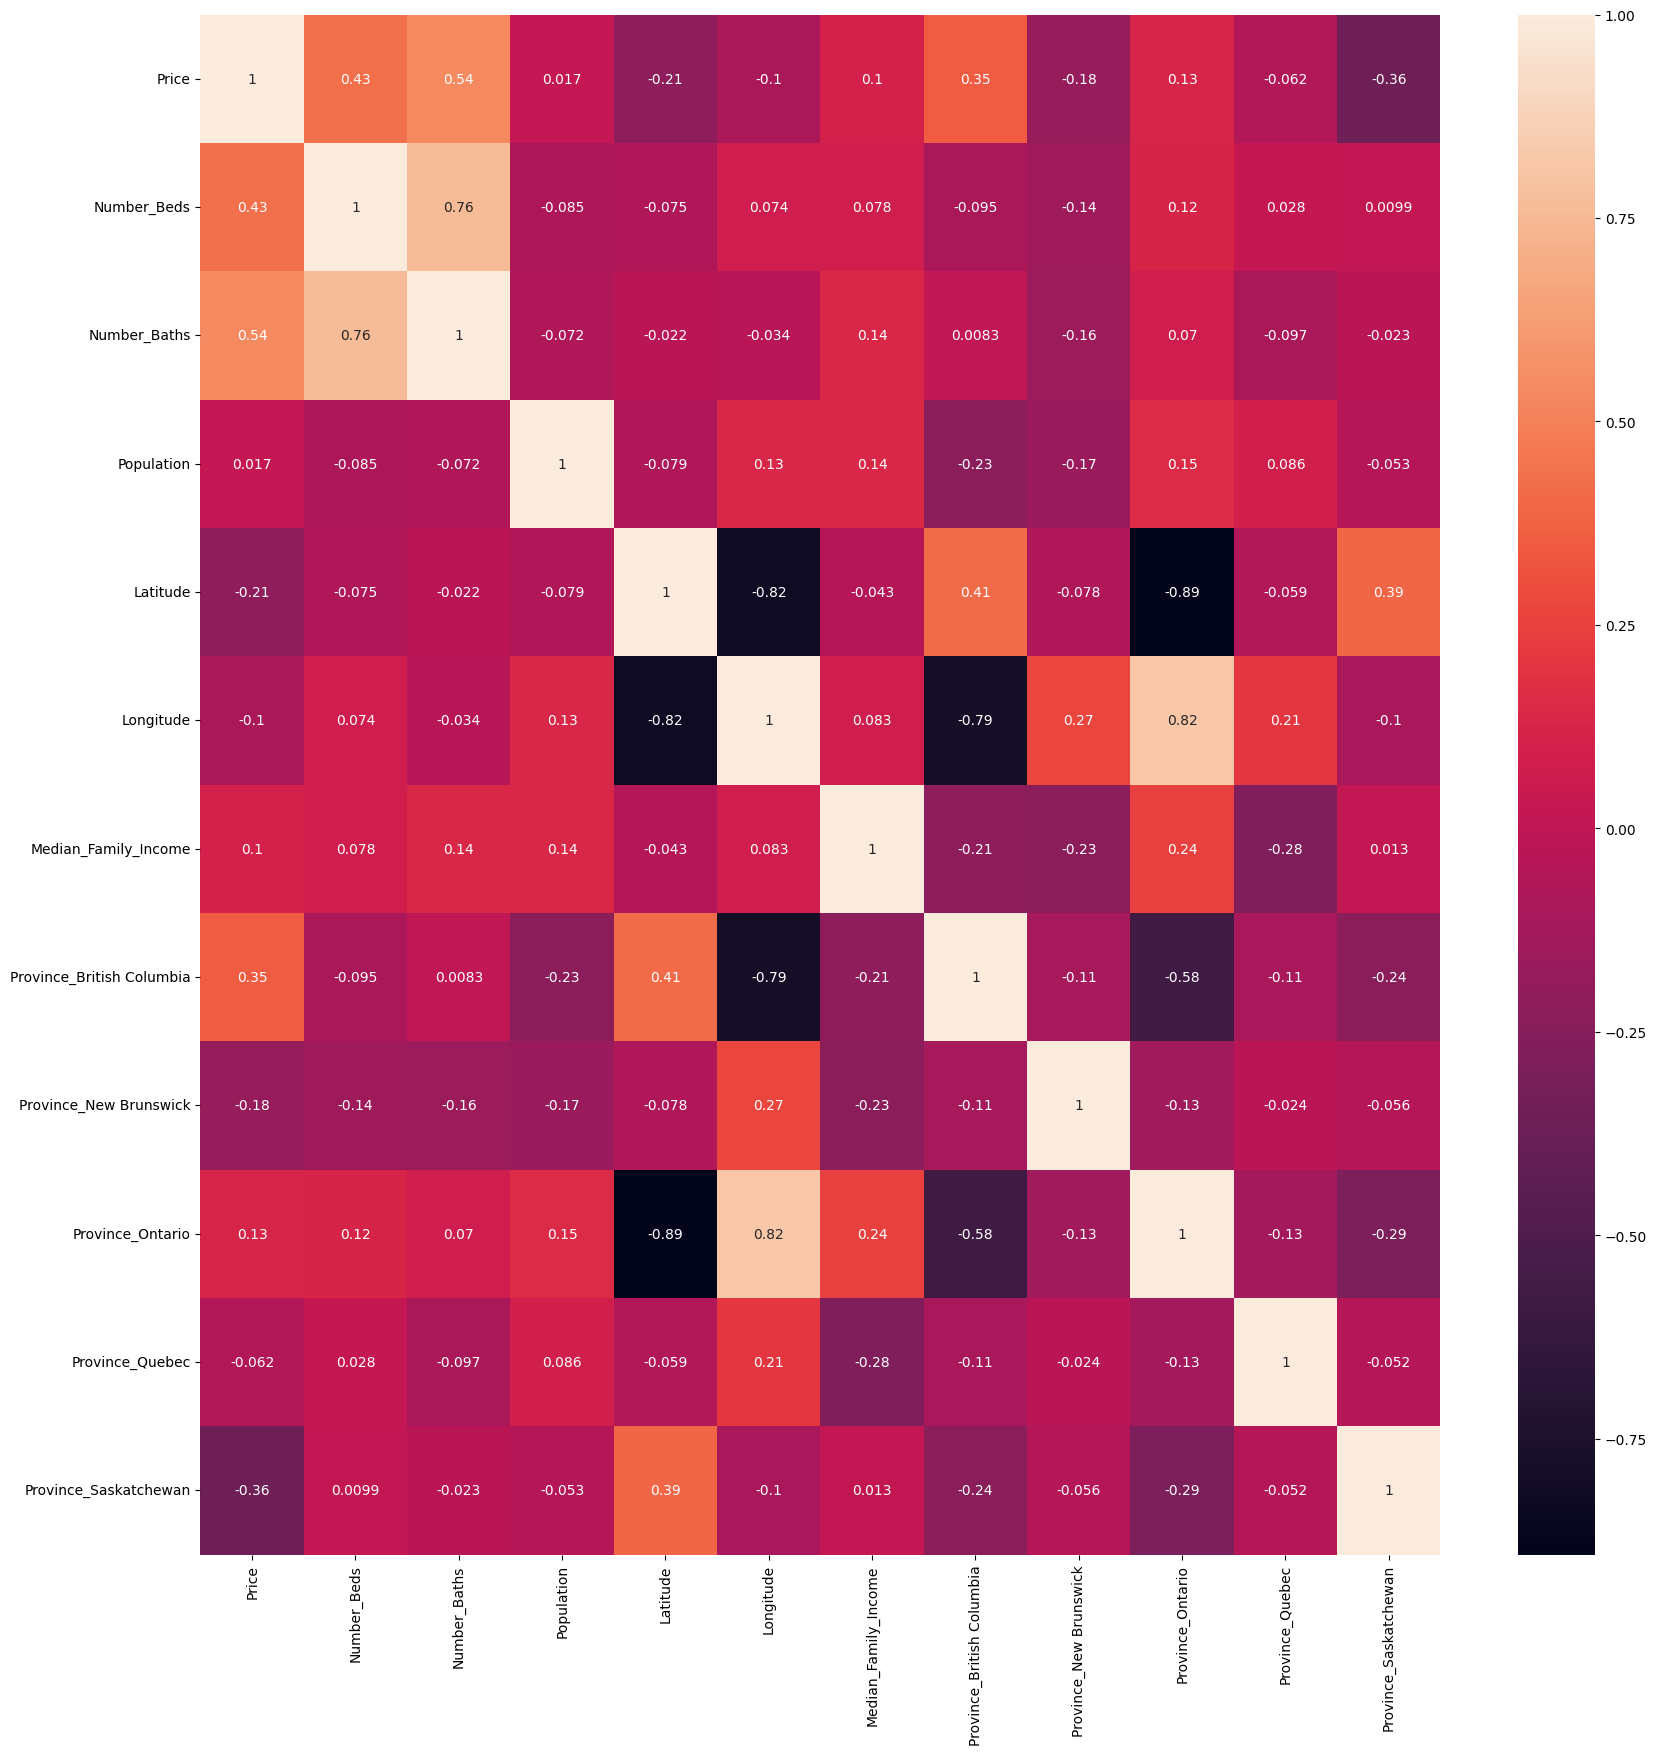

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df_current.corr(),annot=True)

* We can see that the Province columns are highly correlated with location features(latitude and longtitude).
    * That is absolutely normal because the provinces are located in different regions of Canada.

* We can also see that the number of bedrooms and bathrooms are highly correlated with the price.
    * That is also normal because the number of bedrooms and bathrooms are important factors to determine the price of a house.

* We can say that most of the features are not highly correlated with each other. Therefore, we can say that  generally the features are not **multicollinear**.

* *Surprizingly* the population is not highly correlated with the price. We will check the relationship between these features in the next steps.

* We will move on to the next step, checking the distribution of the target variable.

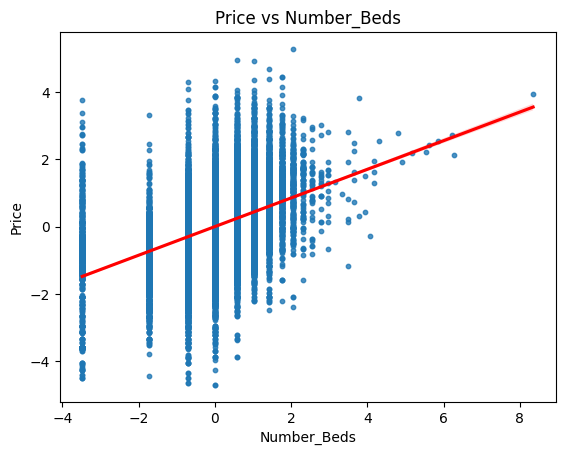

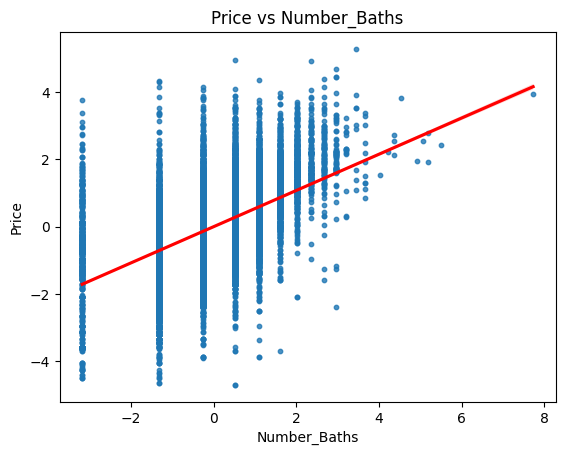

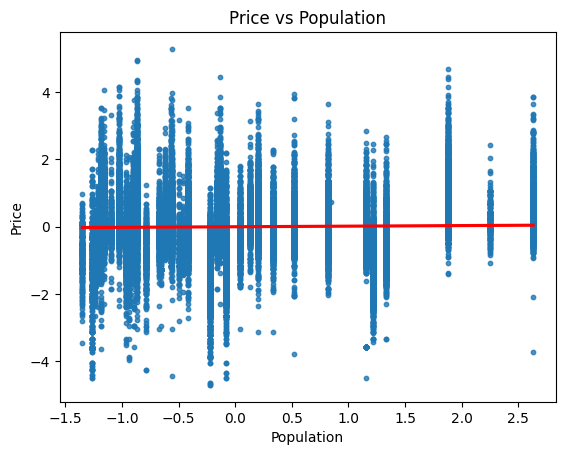

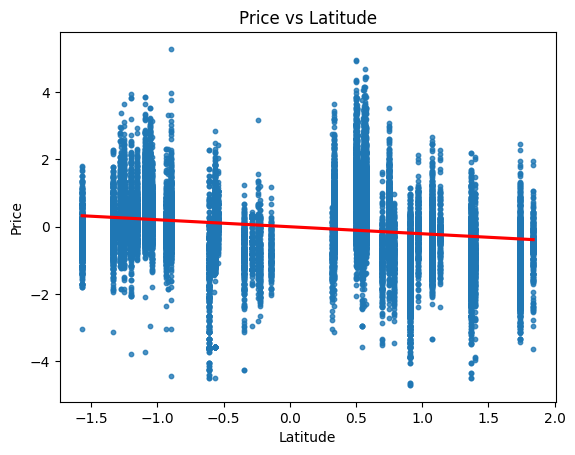

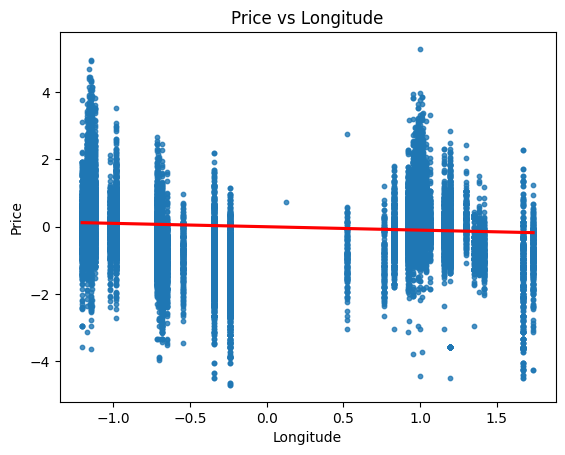

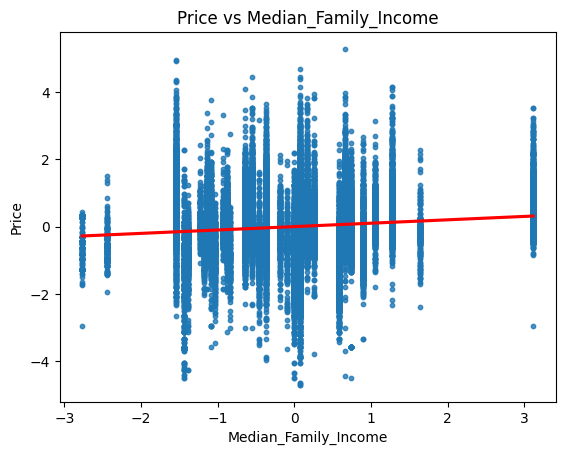

In [35]:
for col in l_num:
    if col != 'Price':
        sns.regplot(x=col,y='Price',data=df_current,fit_reg=True,scatter_kws={'s':10},line_kws={'color':'red'})
        plt.title("Price vs "+col)
        plt.show()

* Median family income and population are not highly correlated with the price.

That is surprizing because we would expect that the price of the houses would be higher in the regions where the median family income is higher and the population is lower.

However, the correlation matrix tells us the opposite. We may drop or transform these features in the next steps.

### Clustering the Cities
* So far we have seen that the provinces are highly correlated with the location features.
* We will check if we can visualize clusters with the Latitude and Longitude columns.
* We will use the KMeans algorithm to cluster the cities.

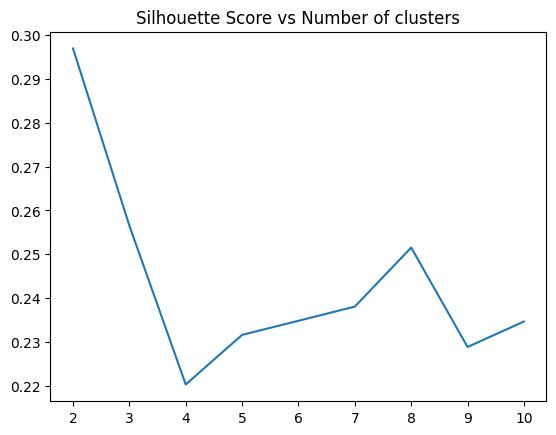

In [36]:
## Clustering the data using KMeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

l_silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=42,n_init="auto")
    kmeans.fit(df_current)
    l_silhouette.append(silhouette_score(df_current,kmeans.labels_))

plt.plot(range(2,11),l_silhouette)
plt.title("Silhouette Score vs Number of clusters")
plt.show()


We can see that by the elbow method, the optimal number of clusters is 4.

In [37]:
K = 4
kmeans = KMeans(n_clusters=K,random_state=42,n_init="auto")
kmeans.fit(df_current)

KMeans(n_clusters=4, n_init='auto', random_state=42)

<Axes: xlabel='Longitude', ylabel='Latitude'>

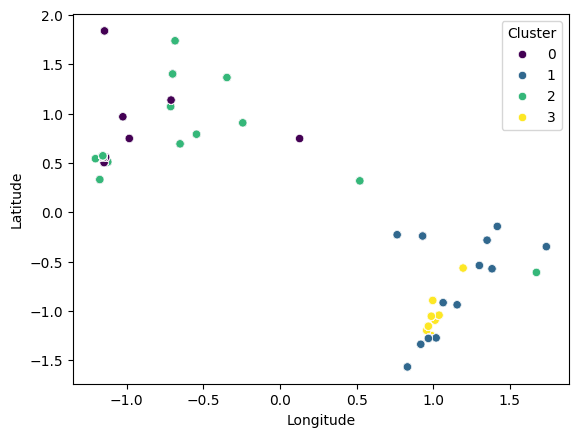

In [38]:
## Visualizing the clusters
df_current['Cluster'] = kmeans.labels_

sns.scatterplot(x='Longitude',y='Latitude',data=df_current,hue='Cluster',palette='viridis')

After clustering the cities, we can see that the cities are not clustered well.

That is because the Latitude and Longitude columns are not enough to cluster the cities.

We will move on to the next step after plotting the heatmap once more, Model Building.

In [39]:
df_current.drop(['Cluster'],inplace=True,axis=1) ## Dropping the cluster column since we won't use it.

In [40]:
df_current.head()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_British Columbia,Province_New Brunswick,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,0.111899,0.008649,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
1,0.145986,0.008649,-1.337429,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
2,0.145820,-0.715308,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
3,0.689159,0.570194,-0.257001,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False
4,-0.093976,-1.735668,-1.337429,2.631213,-1.093679,1.011883,0.66246,False,False,True,False,False


Let's visualize the heatmap of the correlation matrix again.

<Axes: >

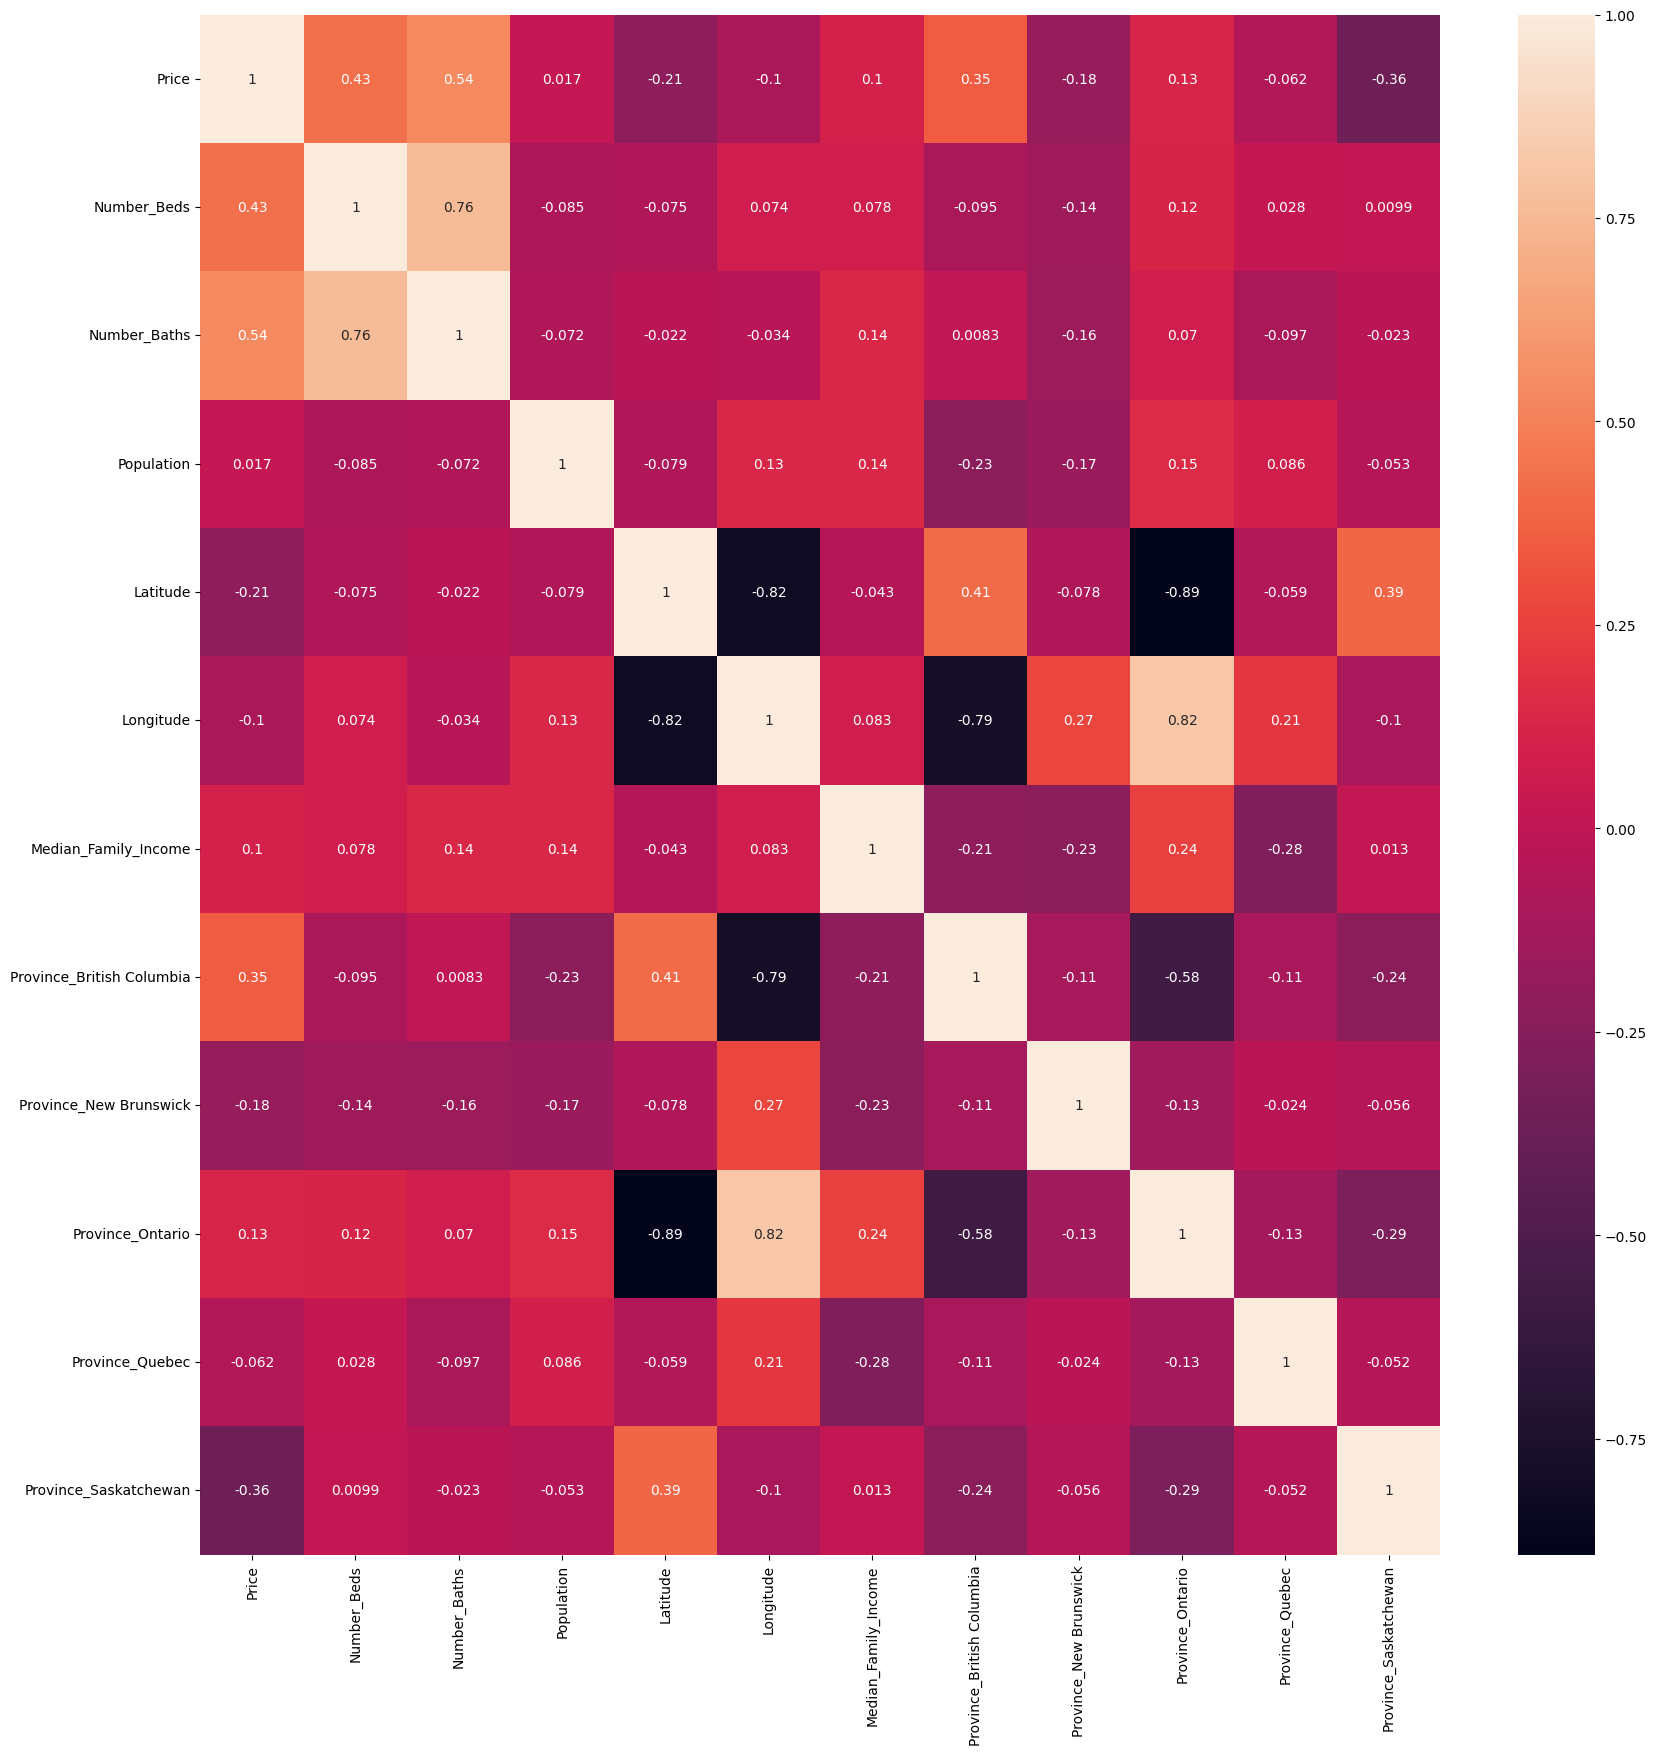

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_current.corr(),annot=True)

* In order to avoid the curse of dimensionality, we will drop the Province_Quebec and Population columns.

* That's because the Province_Quebec and Population columns are not highly correlated with the target variable. (Correlation is less than 0.1)

* By dropping these columns, we will reduce the feature count from 11 to 9.

In [42]:
df_current.drop(['Population'],inplace=True,axis=1) ## Dropping the Population column.
df_current.drop(['Province_Quebec'],inplace=True,axis=1) ## Dropping the Province_Quebec column.

### What have we done so far?
* Checked the correlation between the features.
* Checked the relation of features and target variable.
* Checked if we can cluster the cities with the Latitude and Longitude columns.

### Actions
* Dropped the Latitude and Longitude columns since we can not extract information from them.
* Dropped the median family income and population columns since they have low correlation with target variable.

Now, we have completed the Exploratory Data Analysis.
* We will move on to the next step, Model Training.

Let's save the dataset and move on to the next step, Model Building.

In [43]:
df_current.to_csv('canadian_houses_preprocessed.csv',index=False)

## Model Training

* We will start by splitting the dataset into train and test sets.
* Then we will train the models with the train set.
* We will use the test set to evaluate the models.
* Train and test sets will be splitted as %80 and %20.

* Let's import our data and split it into train and test sets.

In [44]:
df_read = pd.read_csv('canadian_houses_preprocessed.csv') ## Reading the preprocessed data

In [45]:
df_read.head() ## Checking the first 5 rows

,Price,Number_Beds,Number_Baths,Latitude,Longitude,Median_Family_Income,Province_British Columbia,Province_New Brunswick,Province_Ontario,Province_Saskatchewan
0,0.111899,0.008649,-0.257001,-1.093679,1.011883,0.66246,False,False,True,False
1,0.145986,0.008649,-1.337429,-1.093679,1.011883,0.66246,False,False,True,False
2,0.145820,-0.715308,-0.257001,-1.093679,1.011883,0.66246,False,False,True,False
3,0.689159,0.570194,-0.257001,-1.093679,1.011883,0.66246,False,False,True,False
4,-0.093976,-1.735668,-1.337429,-1.093679,1.011883,0.66246,False,False,True,False


In [46]:
df_read.shape ## Checking the shape of the dataframe

(34490, 10)

### Train and Test Sets

* We will first extract the target variable from the dataset.

In [47]:
X = df_read.drop(['Price'],axis=1) ## Features
y = df_read['Price'] ## Target

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(27592, 9)
(27592,)
(6898, 9)
(6898,)


We have splitted our data into train and test sets. Now we will move on to the next step, Model Building.

### Model Building
* We will start with defining a function to evaluate the models.
* Then we will train the models and evaluate them.

But first let's import the libraries for models.

In [50]:
## Importing the models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [51]:
## Importing the metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Now it's time to write a function that will evaluate the models.

In [52]:
def eval_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [53]:
def eval_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    return mae,r2,mse

In [54]:
def kfold_eval(model,X,y,n_splits=5):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=n_splits)
    return scores.mean()

In [55]:
def grid_search(model,param_grid,X_train,y_train):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(model,param_grid,scoring='neg_mean_squared_error',cv=5)
    grid.fit(X_train,y_train)
    return grid.best_params_

### Multiple Linear Regression

In [56]:
best_params_lr = grid_search(LinearRegression(),{'fit_intercept':[True,False]},X_train,y_train)
y_pred_mlr = eval_model(LinearRegression(**best_params_lr),X_train,X_test,y_train,y_test)
mae_lr,r2_lr,mse_lr = eval_metrics(y_test,y_pred_mlr)

In [57]:
print("Mean of the KFold scores for Linear Regression(negative MSE): ",kfold_eval(LinearRegression(**best_params_lr),X,y))

Mean of the KFold scores for Linear Regression(negative MSE):  -0.4496153046258503


In [58]:
print("Linear Regression with best parameters:")
print("MAE:",mae_lr)
print("R2:",r2_lr)
print("MSE:",mse_lr)

Linear Regression with best parameters:
MAE: 0.4560909517621839
R2: 0.5848250125005029
MSE: 0.40182024390304677


### Support Vector Regression

In [59]:
best_params_svr = grid_search(SVR(),{
    'C': [0.1, 1, 10,100],
    'epsilon': [0.1, 0.01, 0.001]
}
,X_train,y_train) ## It takes a lot of time to run this code, run it only if you have time :) .
y_pred_svr = eval_model(SVR(**best_params_svr),X_train,X_test,y_train,y_test)
mae_svr,r2_svr,mse_svr = eval_metrics(y_test,y_pred_svr)

In [60]:
print("Mean of the KFold scores for SVR(negative MSE): ",kfold_eval(SVR(**best_params_svr),X,y))

Mean of the KFold scores for SVR(negative MSE):  -16.214688220780054


In [61]:
print("Support Vector Regression")
print("MAE:",mae_svr)
print("R2:",r2_svr)
print("MSE:",mse_svr)

Support Vector Regression
MAE: 0.37145753231953305
R2: 0.6958906918257111
MSE: 0.2943271633961996


### KNN Regressor

In [62]:
best_params_knn = grid_search(KNeighborsRegressor(),{
    'n_neighbors': list(range(3,31,2)),
},X_train,y_train)

print("Best parameters for KNN:",best_params_knn)

Best parameters for KNN: {'n_neighbors': 25}


In [63]:
y_pred_knn = eval_model(KNeighborsRegressor(**best_params_knn),X_train,X_test,y_train,y_test)
mae_knn,r2_knn,mse_knn = eval_metrics(y_test,y_pred_knn)

In [64]:
print("Mean of the KFold scores for KNN(negative MSE): ",kfold_eval(KNeighborsRegressor(**best_params_knn),X,y))

Mean of the KFold scores for KNN(negative MSE):  -0.4960419443269178


In [65]:
print("K Nearest Neighbors")
print("MAE:",mae_knn)
print("R2:",r2_knn)
print("MSE:",mse_knn)

K Nearest Neighbors
MAE: 0.38981501973379734
R2: 0.6832820426576101
MSE: 0.30653023592358886


### Random Forest Regressor

In [66]:
best_params_rfr = grid_search(RandomForestRegressor(),{
    'n_estimators': [100,200,300,400,500],
    'max_depth': [5,10,15,20,25,30],
    'random_state': [42]
},X_train,y_train)  ## It takes a lot of time to run this code, run it only if you have time :) .

In [67]:
y_pred_rfr = eval_model(RandomForestRegressor(**best_params_rfr),X_train,X_test,y_train,y_test)
mae_rfr,r2_rfr,mse_rfr = eval_metrics(y_test,y_pred_rfr)

In [68]:
print("Mean of the KFold scores for Random Forest(negative MSE): ",kfold_eval(RandomForestRegressor(**best_params_rfr),X,y))

Mean of the KFold scores for Random Forest(negative MSE):  -0.4026760277540234


In [69]:
print("Random Forest Regressor")
print("MAE:",mae_rfr)
print("R2:",r2_rfr)
print("MSE:",mse_rfr)

Random Forest Regressor
MAE: 0.37841766822665085
R2: 0.6985153607943941
MSE: 0.2917869209516514


### Gradient Boosting Regressor

In [70]:
best_params_gbr = grid_search(GradientBoostingRegressor(),{
    'n_estimators': [100,200,300,400,500],
    'max_depth': [5,10,15,20,25,30],
    'random_state': [42]
},X_train,y_train)  ## It takes a lot of time to run this code, run it only if you have time :) .

In [71]:
y_pred_gbr = eval_model(GradientBoostingRegressor(**best_params_gbr),X_train,X_test,y_train,y_test)
mae_gbr,r2_gbr,mse_gbr = eval_metrics(y_test,y_pred_gbr)

In [72]:
print("Mean of the KFold scores for Gradient Boosting(negative MSE): ",kfold_eval(GradientBoostingRegressor(**best_params_gbr),X,y))

Mean of the KFold scores for Gradient Boosting(negative MSE):  -0.3989403150149041


In [73]:
print("Gradient Boosting Regressor")
print("MAE:",mae_gbr)
print("R2:",r2_gbr)
print("MSE:",mse_gbr)

Gradient Boosting Regressor
MAE: 0.37665021722897796
R2: 0.700315017522398
MSE: 0.29004515295704375


### MLP Regressor (Neural Network)

In [74]:
best_params_mlp = grid_search(MLPRegressor(),{
    'hidden_layer_sizes': [(100,100),(150,150),(200,200),(250,250)],
    'max_iter': [1000],
    'random_state': [42]
},X_train,y_train)  ## It takes a lot of time to run this code, run it only if you have time :) .

* Note: I couldn't run the grid search with more parameters because it took too much time. Therefore, I have used just the 'hidden layer sizes' parameters of the model.

In [75]:
best_params_mlp

{'hidden_layer_sizes': (200, 200), 'max_iter': 1000, 'random_state': 42}

In [76]:
y_pred_mlp = eval_model(MLPRegressor(**best_params_mlp),X_train,X_test,y_train,y_test)
mae_mlp,r2_mlp,mse_mlp = eval_metrics(y_test,y_pred_mlp)

In [77]:
print("Mean of the KFold scores for MLP(negative MSE): ",kfold_eval(MLPRegressor(**best_params_mlp),X,y))

Mean of the KFold scores for MLP(negative MSE):  -0.4966654918641093


In [78]:
print("Multi Layer Perceptron")
print("MAE:",mae_mlp)
print("R2:",r2_mlp)
print("MSE:",mse_mlp)

Multi Layer Perceptron
MAE: 0.38350673690138
R2: 0.6953342211367889
MSE: 0.294865734347437


## Model Evaluation
* This part is evaluated in the report of the notebook.
* We will evaluate the models with the R2 Score, Mean Squared Error, Mean Absolute Error.
* We will compare the models and decide which model is the best.

* **Gradient Boosting is the best model compared to the other models.**
* **It has the highest R2 Score and the lowest Mean Squared Error and Mean Absolute Error.**

**You can check detailed comparison and evalution of the regression models in the Report pdf.**

Thanks for inspecting! If you detect any faults or have any recommendations please mail to alperendemirci65@gmail.com